In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from functions.plotting import plot_empty

# Mongodb params
client = MongoClient()
medical_notes_kaggle_db = client.medical_notes_kaggle

pd.set_option('max_rows', 10)

In [2]:
save=False

# Get Data

In [3]:
# Get all data
query = {}
results = medical_notes_kaggle_db.train.find(query)  # should learn how to do this correctly 
training_set = list(results)  # list of dictionaries, would have been the same as reading directly from json

In [4]:
# Store headers and text data in dataframe

train_df = pd.DataFrame(columns=['index_', 'note_text', 'section_headers', 'clinical_domain'])

to_exclude = {'_id', 'index_', 'clinical_domain'}
for note in training_set:
    train_df = train_df.append(
        [{'index_': note.get('index_'),
          'clinical_domain': note.get('clinical_domain'),
          'section_headers': ', '.join([key for key in note.keys() if key not in to_exclude]),
          'note_text': ', '.join([val for val in note.values()
                                  if val not in map(lambda key: note[key], to_exclude)])}]
    )
    
train_df['num_char'] = train_df.note_text.apply(len) # Add num_char column
train_df['num_section_headers'] = train_df['section_headers'].apply(lambda x: x.count(',') +1) # Count section headers
train_df = train_df.dropna().sort_values('index_').reset_index(drop=True)

train_df.head() # View data

,index_,note_text,section_headers,clinical_domain,num_char,num_section_headers
0,1001,"Difficulty with word finding., This 27y/o RHF ...","CC, HX, MEDS, PMH, FHX, SHX, EXAM, COURSE",Neurology,5417,8
1,1002,"Ganglion of the left wrist., Ganglion of the l...","PREOPERATIVE DIAGNOSIS, POSTOPERATIVE DIAGNOSI...",Orthopedic,1453,5
2,1003,"Cervical myelopathy, C3-4, secondary to stenos...","PREOPERATIVE DIAGNOSIS, POSTOPERATIVE DIAGNOSE...",Orthopedic,6526,13
3,1004,"MRI LEFT SHOULDER, This is a 69-year-old male ...","EXAM, CLINICAL, FINDINGS, IMPRESSION",Radiology,2757,4
4,1005,The patient is a 57-year-old female being seen...,"HISTORY OF PRESENT ILLNESS, PAST MEDICAL HISTO...",Orthopedic,3107,8


# Plot Number of Notes by Clinical Domain

In [5]:
clinical_domain_list = ['Orthopedic', 'Neurology', 'Urology', 'Gastroenterology', 'Radiology']

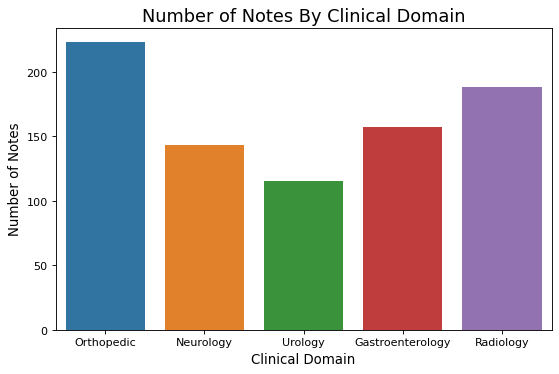

In [6]:
# Plot
fig, ax = plot_empty(title='Number of Notes By Clinical Domain', figsize=(8, 5))
ax = sns.countplot(x='clinical_domain', data=train_df, palette=None, order=clinical_domain_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Number of Notes', fontsize=12)

if save:
    plt.savefig("figures/clinical_domain-num_notes.png", transparent=True, bbox_inches="tight")
    
plt.show(fig)
plt.close()

# Plot Number of Characters by Clinical Domain

In [7]:
train_df.groupby('clinical_domain').mean()['num_char']

clinical_domain
Gastroenterology    2455.216561
Neurology           3397.125874
Orthopedic          3847.484305
Radiology           1888.186170
Urology             2407.165217
Name: num_char, dtype: float64

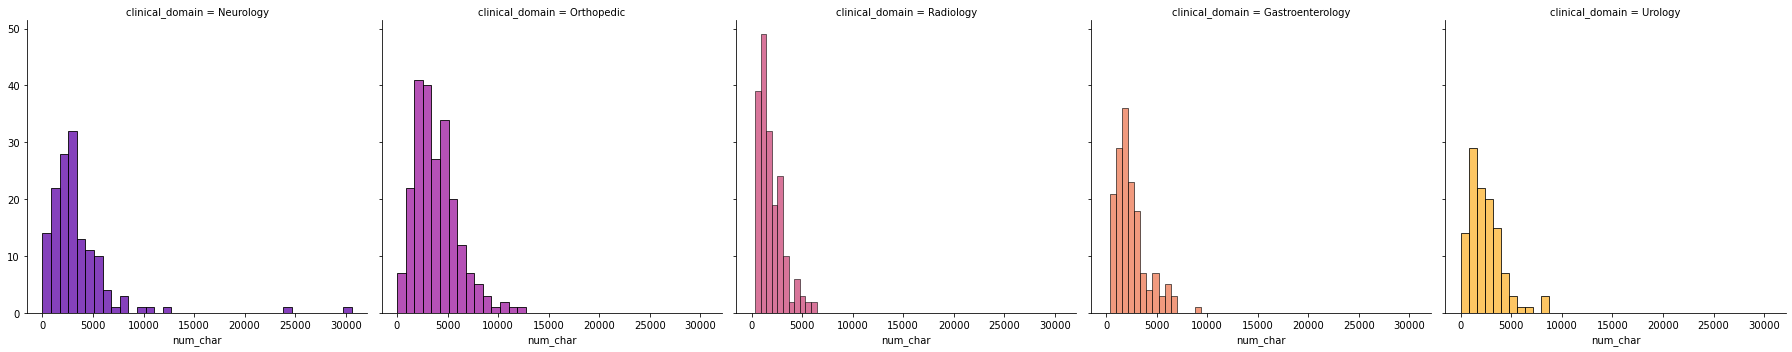

In [8]:
# Check distribution of data by class
ax = sns.FacetGrid(data = train_df, col = 'clinical_domain', hue = 'clinical_domain', palette='plasma', height=5)
ax.map(sns.histplot, "num_char")

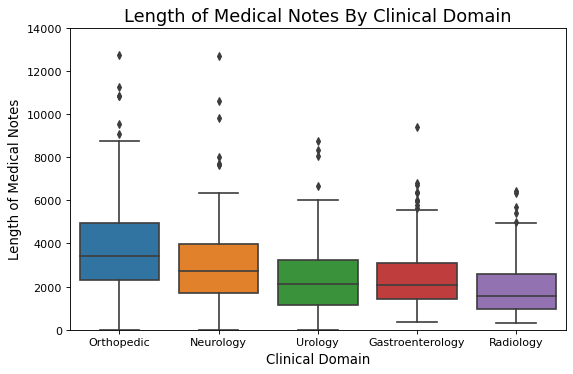

In [9]:
# Plot
fig, ax = plot_empty(title='Length of Medical Notes By Clinical Domain', figsize=(8, 5))
sns.boxplot(x = 'clinical_domain', y = 'num_char', data = train_df, order = clinical_domain_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Length of Medical Notes', fontsize=12)
plt.ylim((0, 14000))

if save:
    plt.savefig("figures/clinical_domain-num_char.png", transparent=True, bbox_inches="tight")

plt.show(fig)
plt.close()

# Plot Header Length by Clinical Domain

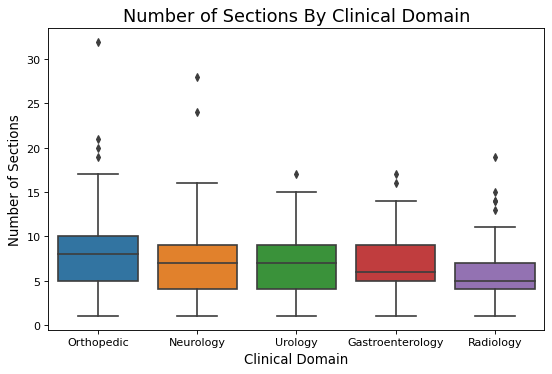

In [10]:
# Plot
fig, ax = plot_empty(title='Number of Sections By Clinical Domain', figsize=(8, 5))
sns.boxplot(x = 'clinical_domain', y = 'num_section_headers', data = train_df, order = clinical_domain_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Number of Sections', fontsize=12)

if save:
    plt.savefig("figures/clinical_domain-num_sections.png", transparent=True, bbox_inches="tight")

plt.show(fig)
plt.close()